In [1]:
import cv2
import math
import csv
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from ultralytics.solutions.solutions import BaseSolution
from ultralytics.utils.plotting import Annotator, colors
from datetime import datetime
%matplotlib inline

## PRUEBA MODELO YOLO11N-SEG (5 EPOCHS)

In [ ]:
# CARGAR EL MODELO YOLO
model = YOLO("yolo11n-seg.pt")

100%|██████████| 5.90M/5.90M [00:00<00:00, 63.4MB/s]


In [3]:
# HACER FINE TUNNING DESDE COMANDO (partir de una version concreta de YOLO y entrenarla con nuestros datos)
#!yolo task=segment mode=train epochs=30 model='yolo11n-seg' data="C:\Users\Unai Chasco Deza\Desktop\Proyecto_Final\dataset_fotos\data.yaml"

# Define el modelo y el archivo de configuración
data_yaml= "/home/iabd/Escritorio/Proyecto_Final/dataset_fotos/data.yaml"  # Ruta del archivo data.yaml

# Entrenar el modelo
model.train(data=data_yaml, epochs=5)  # Entrenamiento con 30 épocas

New https://pypi.org/project/ultralytics/8.3.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/home/iabd/Escritorio/Proyecto_Final/dataset_fotos/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

100%|██████████| 5.35M/5.35M [00:00<00:00, 58.0MB/s]


AMP: checks passed ✅


train: Scanning /home/iabd/Escritorio/Proyecto_Final/dataset_fotos/train/labels... 5297 images, 34 backgrounds, 0 corrupt: 100%|██████████| 5297/5297 [00:01<00:00, 2759.44it/s]

train: WARNING ⚠️ /home/iabd/Escritorio/Proyecto_Final/dataset_fotos/train/images/UBEAT_69_10_1_frame_231_jpg.rf.b18871b998ee767d3289ef66bc254c67.jpg: 1 duplicate labels removed


train: New cache created: /home/iabd/Escritorio/Proyecto_Final/dataset_fotos/train/labels.cache


val: Scanning /home/iabd/Escritorio/Proyecto_Final/dataset_fotos/valid/labels... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<00:00, 2797.38it/s]

val: New cache created: /home/iabd/Escritorio/Proyecto_Final/dataset_fotos/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/5      3.25G      1.006      2.822      4.338       1.31         10        640: 100%|██████████| 332/332 [01:43<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.59it/s]

                   all        332        547      0.755     0.0713     0.0628     0.0469      0.753      0.069     0.0581     0.0414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/5         3G      1.003      2.418      3.151      1.299          1        640: 100%|██████████| 332/332 [01:34<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.28it/s]


                   all        332        547      0.739      0.188      0.208      0.163      0.738      0.184      0.202      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.15G     0.9629      2.319      2.552      1.269          2        640: 100%|██████████| 332/332 [01:33<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.33it/s]


                   all        332        547      0.765      0.259      0.329      0.266      0.766      0.242      0.328      0.245

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.06G     0.9169      2.195      2.237      1.244          1        640: 100%|██████████| 332/332 [01:34<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.21it/s]


                   all        332        547      0.756      0.319      0.377      0.301      0.723       0.33      0.372      0.283

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.08G     0.8687      2.143      2.055      1.208          5        640: 100%|██████████| 332/332 [01:34<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.28it/s]


                   all        332        547        0.8      0.338      0.414      0.339      0.795      0.337      0.415      0.319

5 epochs completed in 0.137 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11n-seg summary (fused): 265 layers, 2,842,368 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.70it/s]


                   all        332        547      0.798      0.338      0.419      0.339      0.796      0.337      0.415      0.319
                Tomate        116        120      0.565      0.625      0.637      0.463      0.579      0.642       0.64      0.408
             Zanahoria         14         14      0.686          1      0.973       0.81      0.685          1      0.973      0.785
                   Ajo          4          4          1          0      0.542      0.542          1          0      0.482      0.387
             Calabacín          3          3          0          0      0.426      0.426          0          0      0.426      0.337
                Patata         16         25      0.453       0.84      0.785      0.662      0.452       0.84      0.785      0.639
                Puerro          2          2          1          0      0.332      0.332          1          0      0.332      0.196
                 Berro          3          3          1          0   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ddd1afd4590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.0

In [4]:
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}")

Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11n-seg summary (fused): 265 layers, 2,842,368 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /home/iabd/Escritorio/Proyecto_Final/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.88it/s]


                   all        332        547      0.795      0.339      0.419      0.339      0.793      0.338      0.415      0.317
                Tomate        116        120      0.566      0.629      0.636      0.463      0.581      0.647      0.639      0.407
             Zanahoria         14         14      0.682          1      0.973      0.809      0.681          1      0.973      0.782
                   Ajo          4          4          1          0      0.542      0.542          1          0      0.482      0.387
             Calabacín          3          3          0          0      0.426      0.426          0          0      0.426      0.337
                Patata         16         25      0.451       0.84      0.785      0.662      0.451       0.84      0.785      0.639
                Puerro          2          2          1          0      0.332      0.332          1          0      0.332      0.196
                 Berro          3          3          1          0   


0: 480x640 1 Zanahoria, 34.0ms
Speed: 9.9ms preprocess, 34.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Tomate', 1: 'Zanahoria', 2: 'Ajo', 3: 'Calabacín', 4: 'Patata', 5: 'Pimiento Verde', 6: 'Pimiento Rojo', 7: 'Puerro', 8: 'Berro', 9: 'Lechuga', 10: 'Arroz', 11: 'Arroz con guisantes', 12: 'Bacalao', 13: 'Batata dulce', 14: 'Remolacha', 15: 'Brócoli', 16: 'Jurel', 17: 'Corvina', 18: 'Chuleta', 19: 'Col lombarda', 20: 'Coliflor', 21: 'Guisante', 22: 'Espinaca', 23: 'Pollo', 24: 'Pollo con champiñones', 25: 'Lomo', 26: 'Pasta', 27: 'Pasta de coditos', 28: 'Pasta fusilli', 29: 'Maíz', 30: 'Huevo', 31: 'Pepino', 32: 'Puré', 33: 'Gallineta', 34: 'Repollo', 35: 'Salmón', 36: 'Salchicha', 37: 'Salchicha silesiana', 38: 'Pan', 39: 'Queso crema'}
obb: None
orig_img: array([[[  1,   6,   4]

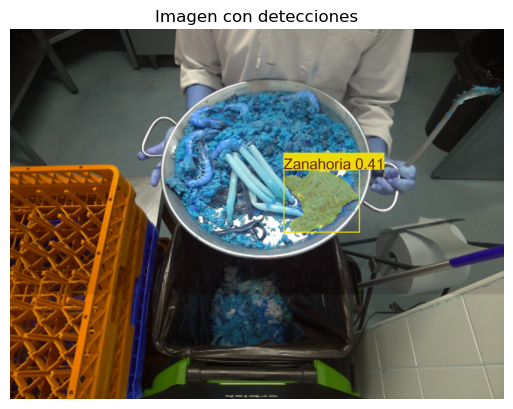

In [9]:
# PREDICCION DEL MODELO (UNA IMAGEN COGIDA DE INTERNET)
img = Image.open("/home/iabd/Escritorio/Proyecto_Final/Fotos/webscrapping/imagen_2_10.jpg")

# Deteccion de objetos en la imagen
resultados = model(img)
print(resultados)

# Imagen anotada con las detecciones
pred = resultados[0].plot()

# Mostrar los resultados
plt.imshow(pred)
plt.axis("off") 
plt.title("Imagen con detecciones")
plt.show()


0: 480x640 1 Zanahoria, 5.1ms
Speed: 1.5ms preprocess, 5.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Clase detectada: Zanahoria - Confianza: 0.41


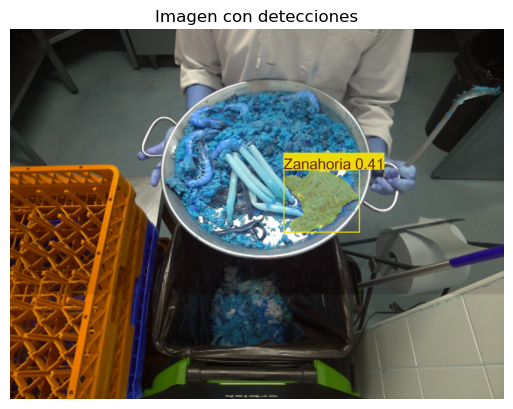

In [ ]:
# Cargar el modelo entrenado
model = YOLO("runs/segment/train/weights/best.pt")

# Cargar imagen desde la ruta
img = Image.open("/home/iabd/Escritorio/Proyecto_Final/Fotos/webscrapping/imagen_2_10.jpg")

# Realizar la detección
resultados = model(img)  

# Obtener los nombres de las clases
class_names = model.names

# Imprimir todas las detecciones sin importar la confianza
for resultado in resultados:
    for box, cls, conf in zip(resultado.boxes.xyxy, resultado.boxes.cls, resultado.boxes.conf):
        print(f"Clase detectada: {class_names[int(cls)]} - Confianza: {conf:.2f}")

# Obtener la imagen anotada con las detecciones
pred = resultados[0].plot()

# Mostrar la imagen con las detecciones
plt.imshow(pred)
plt.axis("off")  
plt.title("Imagen con detecciones")
plt.show()


## PRUEBA MODELO YOLO11M-SEG (20 EPOCHS)

In [2]:
# CARGAR EL MODELO YOLO
model = YOLO("yolo11m-seg.pt")

In [3]:
# HACER FINE TUNNING DESDE COMANDO (partir de una version concreta de YOLO y entrenarla con nuestros datos)
#!yolo task=segment mode=train epochs=30 model='yolo11n-seg' data="C:\Users\Unai Chasco Deza\Desktop\Proyecto_Final\dataset_fotos\data.yaml"

# Define el modelo y el archivo de configuración
data_yaml= "/home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/data.yaml"  # Ruta del archivo data.yaml

# Entrenar el modelo
model.train(data=data_yaml, batch=8, epochs=20)  # Entrenamiento con 30 épocas

New https://pypi.org/project/ultralytics/8.3.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=/home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/train/labels.cache... 5297 images, 34 backgrounds, 0 corrupt: 100%|██████████| 5297/5297 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/train/images/UBEAT_69_10_1_frame_231_jpg.rf.b18871b998ee767d3289ef66bc254c67.jpg: 1 duplicate labels removed



val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]


Plotting labels to runs/segment/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.51G     0.9244      2.464      2.518      1.319          3        640: 100%|██████████| 663/663 [02:27<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.84it/s]

                   all        332        547      0.728      0.433      0.571      0.457      0.731      0.433      0.575      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.52G       0.91      2.287      1.643      1.298          2        640: 100%|██████████| 663/663 [02:24<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.00it/s]

                   all        332        547      0.594      0.687      0.701      0.562      0.584      0.678      0.681       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.48G     0.9255      2.279      1.542      1.315          6        640: 100%|██████████| 663/663 [02:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.16it/s]

                   all        332        547      0.787      0.522      0.693       0.57      0.805      0.524      0.697      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.51G     0.8939      2.221      1.438      1.296          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.01it/s]

                   all        332        547      0.711      0.666      0.786       0.63      0.808      0.603      0.777      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.52G      0.873      2.164       1.35      1.285          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.18it/s]

                   all        332        547      0.697      0.781      0.841      0.695       0.69      0.771      0.827      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.55G     0.8457      2.116      1.276      1.266          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.19it/s]

                   all        332        547      0.695       0.82      0.845      0.716       0.69      0.819      0.839      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.57G     0.8213      2.075      1.226      1.255          5        640: 100%|██████████| 663/663 [02:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.20it/s]

                   all        332        547       0.81      0.829      0.853      0.725      0.822       0.82       0.84       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.47G      0.789      1.981      1.147      1.223          2        640: 100%|██████████| 663/663 [02:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.15it/s]

                   all        332        547      0.734      0.808      0.831      0.699      0.738      0.812      0.828      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.57G     0.7662      1.924       1.07      1.205          4        640: 100%|██████████| 663/663 [02:24<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.20it/s]

                   all        332        547      0.734      0.787      0.853      0.731      0.731      0.797      0.848      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.48G     0.7357      1.881      1.029      1.186          1        640: 100%|██████████| 663/663 [02:24<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.08it/s]

                   all        332        547      0.791      0.845      0.898      0.761      0.784      0.838      0.886      0.715


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.31G      0.704      1.809     0.9585      1.231          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.84it/s]

                   all        332        547      0.874       0.84      0.891      0.759      0.829      0.883      0.914      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.51G     0.6786      1.726     0.8838      1.209          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.14it/s]

                   all        332        547      0.824      0.782      0.878      0.748      0.812      0.787      0.872      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.48G     0.6436      1.666      0.832       1.18          2        640: 100%|██████████| 663/663 [02:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.88it/s]

                   all        332        547      0.772      0.893      0.894      0.763      0.778      0.905      0.895      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.51G     0.6179      1.609     0.7608      1.148          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.12it/s]

                   all        332        547      0.812      0.901      0.901      0.772      0.815      0.903      0.902      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.49G     0.5867      1.524      0.697      1.122          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.16it/s]

                   all        332        547      0.893      0.867      0.915      0.797      0.883      0.877      0.918      0.738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.46G     0.5646      1.484     0.6321      1.107          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.09it/s]

                   all        332        547      0.874      0.883      0.924      0.803      0.878      0.881      0.924       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.52G     0.5479      1.424     0.6024      1.088          1        640: 100%|██████████| 663/663 [02:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.18it/s]

                   all        332        547      0.797      0.931      0.916      0.799      0.791      0.925      0.913       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.44G     0.5201      1.368     0.5412      1.062          3        640: 100%|██████████| 663/663 [02:23<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.17it/s]

                   all        332        547      0.898      0.889      0.918      0.804      0.907      0.895      0.922      0.755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.27G     0.4959      1.326     0.5032      1.046          1        640: 100%|██████████| 663/663 [02:21<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.19it/s]

                   all        332        547      0.843      0.891      0.914      0.804      0.847      0.898      0.912      0.752



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20       5.5G     0.4848      1.296     0.4654      1.031          5        640: 100%|██████████| 663/663 [02:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.18it/s]

                   all        332        547       0.91      0.857      0.924      0.823      0.901      0.851      0.918      0.766



20 epochs completed in 0.823 hours.
Optimizer stripped from runs/segment/train8/weights/last.pt, 45.2MB
Optimizer stripped from runs/segment/train8/weights/best.pt, 45.2MB

Validating runs/segment/train8/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11m-seg summary (fused): 330 layers, 22,366,152 parameters, 0 gradients, 123.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.07it/s]


                   all        332        547       0.91      0.857      0.924      0.822      0.901      0.851      0.918      0.768
                Tomate        116        120       0.95      0.635      0.887      0.738      0.963       0.65      0.858      0.561
             Zanahoria         14         14          1      0.881       0.99      0.907          1      0.884       0.99      0.863
                   Ajo          4          4      0.972          1      0.995      0.995      0.728       0.75      0.794      0.603
             Calabacín          3          3      0.942          1      0.995      0.995       0.94          1      0.995      0.912
                Patata         16         25      0.952      0.788      0.847      0.752      0.952      0.798      0.858      0.753
                Puerro          2          2      0.955          1      0.995      0.995      0.951          1      0.995      0.699
                 Berro          3          3       0.96          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7364d6280fb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.0

In [4]:
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}")

Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11m-seg summary (fused): 330 layers, 22,366,152 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:06<00:00,  6.42it/s]


                   all        332        547       0.91      0.857      0.924      0.822      0.901      0.852      0.919      0.763
                Tomate        116        120       0.95      0.629      0.887      0.738      0.963       0.65      0.858       0.56
             Zanahoria         14         14          1       0.88       0.99      0.907          1      0.884       0.99      0.861
                   Ajo          4          4      0.972          1      0.995      0.995      0.728       0.75      0.794      0.603
             Calabacín          3          3      0.942          1      0.995      0.995       0.94          1      0.995      0.868
                Patata         16         25      0.952      0.785      0.849      0.757      0.952        0.8      0.859      0.755
                Puerro          2          2      0.934          1      0.995      0.995      0.929          1      0.995       0.65
                 Berro          3          3       0.96          1   


0: 480x640 2 Lechugas, 2 Jurels, 2 Lomos, 1 Queso crema, 10.4ms
Speed: 8.6ms preprocess, 10.4ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Tomate', 1: 'Zanahoria', 2: 'Ajo', 3: 'Calabacín', 4: 'Patata', 5: 'Pimiento Verde', 6: 'Pimiento Rojo', 7: 'Puerro', 8: 'Berro', 9: 'Lechuga', 10: 'Arroz', 11: 'Arroz con guisantes', 12: 'Bacalao', 13: 'Batata dulce', 14: 'Remolacha', 15: 'Brócoli', 16: 'Jurel', 17: 'Corvina', 18: 'Chuleta', 19: 'Col lombarda', 20: 'Coliflor', 21: 'Guisante', 22: 'Espinaca', 23: 'Pollo', 24: 'Pollo con champiñones', 25: 'Lomo', 26: 'Pasta', 27: 'Pasta de coditos', 28: 'Pasta fusilli', 29: 'Maíz', 30: 'Huevo', 31: 'Pepino', 32: 'Puré', 33: 'Gallineta', 34: 'Repollo', 35: 'Salmón', 36: 'Salchicha', 37: 'Salchicha silesiana', 38: 'Pan', 39: 'Queso crema'}
obb: None


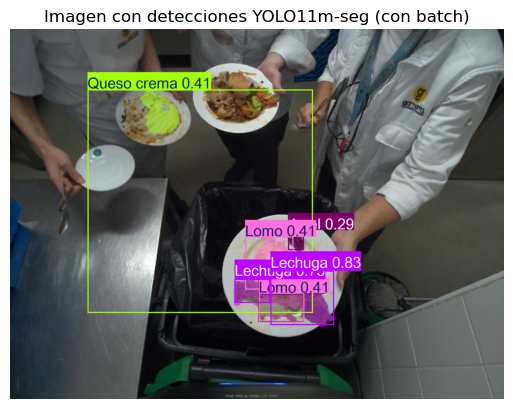

In [7]:
# PREDICCION DEL MODELO (UNA IMAGEN COGIDA DE INTERNET)
img = Image.open("/home/iabd/Escritorio/Proyecto_Final/Fotos/webscrapping/imagen_3_6.jpg")

# Deteccion de objetos en la imagen
resultados = model(img)
print(resultados)

# Imagen anotada con las detecciones
pred = resultados[0].plot()
pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

# Mostrar los resultados
plt.imshow(pred)
plt.axis("off") 
plt.title("Imagen con detecciones YOLO11m-seg (con batch)")
plt.show()

plt.imshow(img)
plt.axis("off") 
plt.title("Imagen sin detecciones")
plt.show()


0: 480x640 1 Tomate, 10.7ms
Speed: 1.4ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Tomate', 1: 'Zanahoria', 2: 'Ajo', 3: 'Calabacín', 4: 'Patata', 5: 'Pimiento Verde', 6: 'Pimiento Rojo', 7: 'Puerro', 8: 'Berro', 9: 'Lechuga', 10: 'Arroz', 11: 'Arroz con guisantes', 12: 'Bacalao', 13: 'Batata dulce', 14: 'Remolacha', 15: 'Brócoli', 16: 'Jurel', 17: 'Corvina', 18: 'Chuleta', 19: 'Col lombarda', 20: 'Coliflor', 21: 'Guisante', 22: 'Espinaca', 23: 'Pollo', 24: 'Pollo con champiñones', 25: 'Lomo', 26: 'Pasta', 27: 'Pasta de coditos', 28: 'Pasta fusilli', 29: 'Maíz', 30: 'Huevo', 31: 'Pepino', 32: 'Puré', 33: 'Gallineta', 34: 'Repollo', 35: 'Salmón', 36: 'Salchicha', 37: 'Salchicha silesiana', 38: 'Pan', 39: 'Queso crema'}
obb: None
orig_img: array([[[ 50,  29,   1],
 

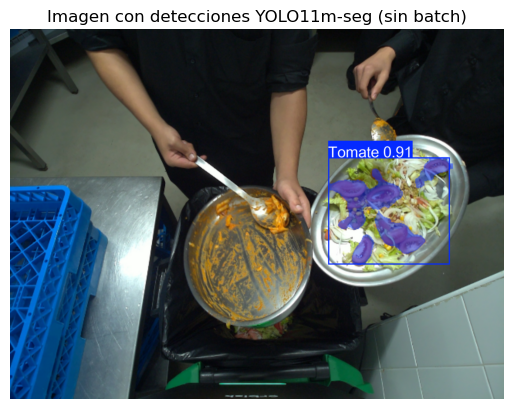

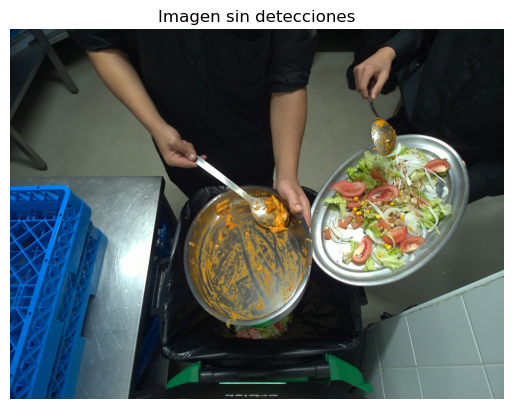

In [11]:
# Cargar el modelo YOLOv5
model = YOLO('/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/Modelo/modelos_entrenados/yolo11m-seg/best.pt')  # O el nombre del archivo .pt que tengas

# PREDICCION DEL MODELO (UNA IMAGEN COGIDA DE INTERNET)
img = Image.open("/home/iabd/Escritorio/Proyecto_Final/Fotos/webscrapping/imagen_10.jpg")

# Deteccion de objetos en la imagen
resultados = model(img)
print(resultados)

# Imagen anotada con las detecciones
pred = resultados[0].plot()
pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

# Mostrar los resultados
plt.imshow(pred)
plt.axis("off") 
plt.title("Imagen con detecciones YOLO11m-seg (sin batch)")
plt.show()

plt.imshow(img)
plt.axis("off") 
plt.title("Imagen sin detecciones")
plt.show()


## PRUEBA MODELO YOLO11L-SEG (20 EPOCHS)

In [6]:
# CARGAR EL MODELO YOLO
model = YOLO("yolo11l-seg.pt")

In [7]:
# HACER FINE TUNNING DESDE COMANDO (partir de una version concreta de YOLO y entrenarla con nuestros datos)
#!yolo task=segment mode=train epochs=30 model='yolo11n-seg' data="C:\Users\Unai Chasco Deza\Desktop\Proyecto_Final\dataset_fotos\data.yaml"

# Define el modelo y el archivo de configuración
data_yaml= "/home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/data.yaml"  # Ruta del archivo data.yaml

# Entrenar el modelo
model.train(data=data_yaml, batch=8, epochs=20)  # Entrenamiento con 30 épocas

New https://pypi.org/project/ultralytics/8.3.92 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
engine/trainer: task=segment, mode=train, model=yolo11l-seg.pt, data=/home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

train: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/train/labels.cache... 5297 images, 34 backgrounds, 0 corrupt: 100%|██████████| 5297/5297 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/train/images/UBEAT_69_10_1_frame_231_jpg.rf.b18871b998ee767d3289ef66bc254c67.jpg: 1 duplicate labels removed



val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]


Plotting labels to runs/segment/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 176 weight(decay=0.0), 187 weight(decay=0.0005), 186 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train10
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.49G     0.8877      2.391      2.391      1.317          3        640: 100%|██████████| 663/663 [02:54<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.31it/s]

                   all        332        547      0.499      0.532      0.524      0.433      0.501      0.537      0.519      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.52G     0.9079      2.289      1.649      1.328          2        640: 100%|██████████| 663/663 [02:51<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.35it/s]

                   all        332        547       0.59       0.56      0.609      0.491      0.588      0.555      0.604      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.52G     0.9317      2.295       1.56      1.356          6        640: 100%|██████████| 663/663 [02:50<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.31it/s]

                   all        332        547      0.672       0.64      0.702      0.573      0.669      0.638      0.696       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.56G     0.8965       2.24      1.465      1.335          1        640: 100%|██████████| 663/663 [02:49<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.41it/s]

                   all        332        547       0.67      0.665      0.754      0.613      0.661      0.627      0.721      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.57G     0.8737      2.196      1.374      1.323          1        640: 100%|██████████| 663/663 [02:49<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.39it/s]

                   all        332        547      0.735       0.65      0.758      0.628      0.747      0.665      0.752      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.59G     0.8378      2.133      1.305      1.294          1        640: 100%|██████████| 663/663 [02:49<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.37it/s]

                   all        332        547      0.696      0.784      0.825      0.684      0.703      0.798      0.825      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.61G     0.8184      2.072      1.233      1.281          5        640: 100%|██████████| 663/663 [02:49<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.37it/s]

                   all        332        547      0.778      0.783      0.834        0.7      0.772      0.778      0.825      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20       6.5G      0.788      1.985      1.145      1.251          2        640: 100%|██████████| 663/663 [02:50<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  5.25it/s]

                   all        332        547      0.775      0.793      0.855      0.734      0.769      0.786      0.845      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.62G     0.7595      1.937      1.087      1.229          4        640: 100%|██████████| 663/663 [02:50<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.35it/s]

                   all        332        547      0.747      0.872      0.877      0.763      0.744      0.869       0.86      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.53G     0.7379      1.891      1.028      1.218          1        640: 100%|██████████| 663/663 [02:50<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.36it/s]

                   all        332        547       0.75      0.879      0.866      0.746      0.748      0.877      0.865      0.686


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.56G     0.6945      1.837     0.9766      1.258          1        640: 100%|██████████| 663/663 [02:49<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.35it/s]

                   all        332        547      0.871       0.79      0.871      0.748      0.811       0.82      0.874      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.54G     0.6672      1.754     0.8982      1.235          1        640: 100%|██████████| 663/663 [02:48<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.47it/s]

                   all        332        547      0.865       0.78      0.879      0.747      0.856      0.773      0.888       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.52G     0.6355      1.694      0.843      1.209          2        640: 100%|██████████| 663/663 [02:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.51it/s]

                   all        332        547      0.724      0.904      0.885      0.787      0.732       0.92      0.885      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.56G     0.6119      1.641     0.7752      1.185          1        640: 100%|██████████| 663/663 [02:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.53it/s]

                   all        332        547      0.826      0.901      0.922      0.812      0.823      0.897      0.917      0.743



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.54G     0.5772      1.559      0.723      1.153          1        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.47it/s]

                   all        332        547      0.815      0.909      0.926      0.816      0.807      0.902      0.912      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.51G     0.5544      1.515     0.6586      1.138          1        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.51it/s]

                   all        332        547      0.857      0.889      0.931      0.822      0.851      0.882      0.918      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.57G     0.5441      1.445     0.6194      1.121          1        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.50it/s]

                   all        332        547      0.895      0.821      0.919      0.813      0.897      0.831       0.91      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.48G     0.5129      1.399     0.5647      1.096          3        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.53it/s]

                   all        332        547      0.805      0.926      0.931      0.824      0.797      0.919      0.919      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.55G     0.4921      1.353     0.5131      1.079          1        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.49it/s]

                   all        332        547      0.807      0.894      0.921      0.816      0.801      0.888      0.912      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.53G      0.471      1.313     0.4739      1.059          5        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.47it/s]

                   all        332        547      0.906      0.861      0.935      0.834      0.903      0.857      0.925      0.755



20 epochs completed in 0.965 hours.
Optimizer stripped from runs/segment/train10/weights/last.pt, 55.9MB
Optimizer stripped from runs/segment/train10/weights/best.pt, 55.9MB

Validating runs/segment/train10/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11l-seg summary (fused): 491 layers, 27,615,432 parameters, 0 gradients, 142.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  5.31it/s]


                   all        332        547      0.905      0.861      0.935      0.835      0.903      0.857      0.925      0.755
                Tomate        116        120      0.952      0.667      0.868      0.712      0.976      0.683      0.896      0.555
             Zanahoria         14         14          1      0.948      0.995      0.891          1      0.948      0.995      0.845
                   Ajo          4          4      0.959          1      0.995      0.995       0.72       0.75       0.65       0.34
             Calabacín          3          3      0.938          1      0.995      0.995      0.938          1      0.995      0.888
                Patata         16         25      0.907       0.78      0.852      0.775      0.953      0.819      0.861      0.746
                Puerro          2          2      0.968          1      0.995      0.995      0.969          1      0.995      0.761
                 Berro          3          3      0.959          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x752eba586ae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.0

In [8]:
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}")

Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11l-seg summary (fused): 491 layers, 27,615,432 parameters, 0 gradients, 142.1 GFLOPs


val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:07<00:00,  5.78it/s]


                   all        332        547      0.906      0.861      0.935      0.835      0.903      0.857      0.925      0.753
                Tomate        116        120      0.952      0.668      0.869      0.709      0.976      0.684      0.897      0.555
             Zanahoria         14         14          1      0.949      0.995      0.891          1      0.948      0.995      0.845
                   Ajo          4          4      0.959          1      0.995      0.995       0.72       0.75       0.65       0.34
             Calabacín          3          3      0.937          1      0.995      0.995      0.938          1      0.995      0.888
                Patata         16         25      0.907       0.78      0.851      0.774      0.953       0.82      0.861      0.747
                Puerro          2          2      0.967          1      0.995      0.995      0.968          1      0.995      0.687
                 Berro          3          3      0.959          1   

In [ ]:
# PREDICCION DEL MODELO (UNA IMAGEN COGIDA DE INTERNET)
img = Image.open("/home/iabd/Escritorio/Proyecto_Final/Fotos/webscrapping/imagen_3_6.jpg")

# Deteccion de objetos en la imagen
resultados = model(img)
print(resultados)

# Imagen anotada con las detecciones
pred = resultados[0].plot()
pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

# Mostrar los resultados
plt.imshow(pred)
plt.axis("off") 
plt.title("Imagen con detecciones")
plt.show()

plt.imshow(img)
plt.axis("off") 
plt.title("Imagen sin detecciones")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/best.pt'

In [12]:
model = YOLO("/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/Modelo/modelos_entrenados/yolo11m-seg/best.pt")
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}")

Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11m-seg summary (fused): 330 layers, 22,366,152 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]


                   all        332        547       0.84      0.877      0.925      0.821      0.853      0.895      0.934      0.748
                Tomate        116        120      0.802      0.778      0.856      0.691      0.785      0.783      0.828      0.549
             Zanahoria         14         14      0.931      0.966      0.986      0.862      0.932      0.976      0.986      0.837
                   Ajo          4          4       0.92          1      0.995      0.995      0.686       0.75      0.643      0.281
             Calabacín          3          3      0.652          1      0.995      0.995       0.64          1      0.995      0.742
                Patata         16         25      0.897        0.8      0.803      0.709      0.981       0.88      0.934      0.714
                Puerro          2          2      0.881          1      0.995      0.995      0.864          1      0.995      0.597
                 Berro          3          3      0.901          1   

In [13]:
model = YOLO("/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/Modelo/modelos_entrenados/yolo11m-seg_batch8/best.pt")
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}")

Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11m-seg summary (fused): 330 layers, 22,366,152 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]


                   all        332        547       0.91      0.857      0.924      0.821      0.902      0.852      0.919      0.766
                Tomate        116        120       0.95      0.629      0.887      0.738      0.963      0.648      0.858       0.56
             Zanahoria         14         14          1       0.88       0.99      0.907          1      0.884       0.99      0.862
                   Ajo          4          4      0.972          1      0.995      0.995      0.728       0.75      0.794      0.603
             Calabacín          3          3      0.942          1      0.995      0.995       0.94          1      0.995      0.912
                Patata         16         25      0.951      0.785      0.847      0.752      0.952      0.797      0.858      0.753
                Puerro          2          2      0.956          1      0.995      0.995      0.951          1      0.995      0.699
                 Berro          3          3       0.96          1   

In [14]:
model = YOLO("/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/Modelo/modelos_entrenados/yolo11l-seg/best.pt")
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}")

Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11l-seg summary (fused): 491 layers, 27,615,432 parameters, 0 gradients, 142.1 GFLOPs


val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.56it/s]


                   all        332        547      0.891      0.876       0.93      0.822      0.886       0.87      0.928      0.757
                Tomate        116        120      0.948      0.733      0.879      0.746      0.959      0.742      0.891      0.598
             Zanahoria         14         14       0.99          1      0.995      0.873       0.99          1      0.995      0.848
                   Ajo          4          4      0.949          1      0.995      0.995      0.712       0.75      0.738      0.521
             Calabacín          3          3      0.928          1      0.995      0.995      0.928          1      0.995      0.815
                Patata         16         25      0.909      0.802      0.845      0.779          1      0.882      0.924      0.754
                Puerro          2          2       0.91          1      0.995      0.995       0.91          1      0.995      0.655
                 Berro          3          3      0.944          1   

In [15]:
model = YOLO("/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/Modelo/modelos_entrenados/yolo11l-seg_batch8/best.pt")
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}")

Ultralytics 8.3.71 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11l-seg summary (fused): 491 layers, 27,615,432 parameters, 0 gradients, 142.1 GFLOPs


val: Scanning /home/iabd/Escritorio/Proyecto_Final_1/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.44it/s]


                   all        332        547      0.906      0.861      0.935      0.836      0.903      0.857      0.925      0.755
                Tomate        116        120      0.952      0.668      0.869      0.709      0.976      0.684      0.897      0.554
             Zanahoria         14         14          1      0.949      0.995      0.891          1      0.948      0.995      0.845
                   Ajo          4          4      0.959          1      0.995      0.995       0.72       0.75       0.65       0.34
             Calabacín          3          3      0.937          1      0.995      0.995      0.938          1      0.995      0.888
                Patata         16         25      0.907       0.78      0.851      0.778      0.953       0.82      0.861      0.748
                Puerro          2          2      0.968          1      0.995      0.995      0.969          1      0.995      0.761
                 Berro          3          3      0.959          1   


0: 480x640 1 Patata, 2 Lechugas, 1 Lomo, 1 Pasta, 13.6ms
Speed: 2.2ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Tomate', 1: 'Zanahoria', 2: 'Ajo', 3: 'Calabacín', 4: 'Patata', 5: 'Pimiento Verde', 6: 'Pimiento Rojo', 7: 'Puerro', 8: 'Berro', 9: 'Lechuga', 10: 'Arroz', 11: 'Arroz con guisantes', 12: 'Bacalao', 13: 'Batata dulce', 14: 'Remolacha', 15: 'Brócoli', 16: 'Jurel', 17: 'Corvina', 18: 'Chuleta', 19: 'Col lombarda', 20: 'Coliflor', 21: 'Guisante', 22: 'Espinaca', 23: 'Pollo', 24: 'Pollo con champiñones', 25: 'Lomo', 26: 'Pasta', 27: 'Pasta de coditos', 28: 'Pasta fusilli', 29: 'Maíz', 30: 'Huevo', 31: 'Pepino', 32: 'Puré', 33: 'Gallineta', 34: 'Repollo', 35: 'Salmón', 36: 'Salchicha', 37: 'Salchicha silesiana', 38: 'Pan', 39: 'Queso crema'}
obb: None
orig_im

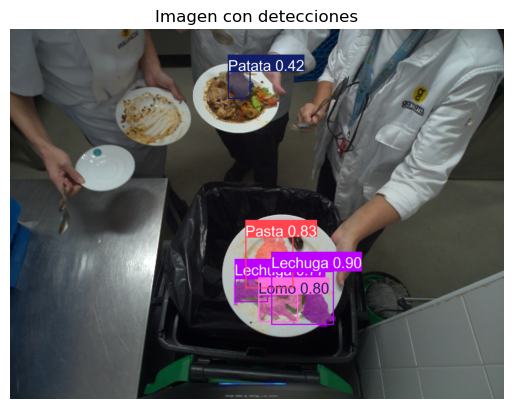

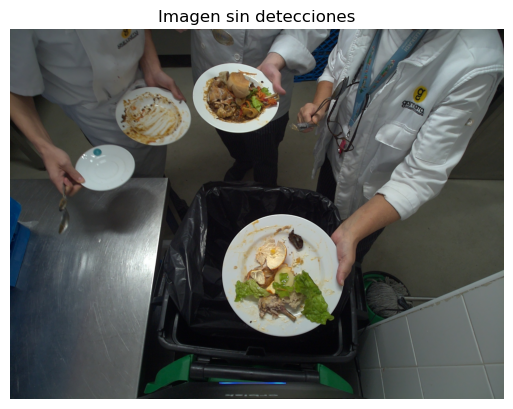

Clase: Lechuga, Confianza: 0.90, Coordenadas de segmentación:
[[     1102.7      994.49]
 [     1102.7      1007.2]
 [     1099.6      1010.3]
 [     1099.6      1013.5]
 [     1096.4      1016.7]
 [     1096.4      1029.3]
 [       1090      1035.7]
 [     1083.7      1035.7]
 [     1080.5      1038.8]
 [       1071      1038.8]
 [       1071      1076.9]
 [     1080.5      1076.9]
 [     1086.9      1083.2]
 [       1090      1083.2]
 [     1093.2      1086.4]
 [     1096.4      1086.4]
 [     1099.6      1089.6]
 [     1102.7      1089.6]
 [     1109.1      1095.9]
 [     1115.4      1095.9]
 [     1118.6      1099.1]
 [     1121.7      1099.1]
 [     1124.9      1095.9]
 [     1131.2      1095.9]
 [     1134.4      1092.7]
 [     1137.6      1092.7]
 [     1156.6      1073.7]
 [     1159.8      1073.7]
 [     1162.9      1070.5]
 [     1169.3      1070.5]
 [     1172.4      1073.7]
 [     1178.8      1073.7]
 [     1181.9      1076.9]
 [     1185.1      1076.9]
 [     1188.3       

In [6]:
model = YOLO("/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/yolo11l-seg_batch8/best.pt")

img = Image.open("/home/iabd/Escritorio/Proyecto_Final/Fotos/webscrapping/imagen_3_6.jpg")

# Deteccion de objetos en la imagen
resultados = model(img)
print(resultados)

# Imagen anotada con las detecciones
pred = resultados[0].plot()
pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

# Mostrar los resultados
plt.imshow(pred)
plt.axis("off") 
plt.title("Imagen con detecciones")
plt.show()

plt.imshow(img)
plt.axis("off") 
plt.title("Imagen sin detecciones")
plt.show()


# Extraer y mostrar coordenadas de segmentación
if resultados[0].masks is not None:
    for i, mask in enumerate(resultados[0].masks.xy):
        label = resultados[0].names[int(resultados[0].boxes.cls[i])]  # Obtener la clase detectada
        conf = resultados[0].boxes.conf[i]  # Obtener la confianza
        print(f"Clase: {label}, Confianza: {conf:.2f}, Coordenadas de segmentación:")
        print(mask)  # Imprimir todas las coordenadas del polígono
else:
    print("No se encontraron máscaras de segmentación en la imagen.")


## PRUEBA MODELO YOLO11X-SEG (20 EPOCHS)

In [6]:

# Define el modelo y el archivo de configuración
data_yaml= "/home/iabd/Escritorio/dataset_fotos/data.yaml"  # Ruta del archivo data.yaml


In [7]:
# CARGAR EL MODELO YOLO
model = YOLO("yolo11x-seg.pt")

# Entrenar el modelo
model.train(data=data_yaml, batch=8, epochs=20)  # Entrenamiento con 30 épocas

New https://pypi.org/project/ultralytics/8.3.95 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.70 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
engine/trainer: task=segment, mode=train, model=yolo11x-seg.pt, data=/home/iabd/Escritorio/dataset_fotos/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

100%|██████████| 5.35M/5.35M [00:00<00:00, 13.4MB/s]


AMP: checks passed ✅


train: Scanning /home/iabd/Escritorio/dataset_fotos/train/labels... 5297 images, 34 backgrounds, 0 corrupt: 100%|██████████| 5297/5297 [00:04<00:00, 1192.50it/s]

train: WARNING ⚠️ /home/iabd/Escritorio/dataset_fotos/train/images/UBEAT_69_10_1_frame_231_jpg.rf.b18871b998ee767d3289ef66bc254c67.jpg: 1 duplicate labels removed


train: New cache created: /home/iabd/Escritorio/dataset_fotos/train/labels.cache


val: Scanning /home/iabd/Escritorio/dataset_fotos/valid/labels... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<00:00, 1067.37it/s]

val: New cache created: /home/iabd/Escritorio/dataset_fotos/valid/labels.cache


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 176 weight(decay=0.0), 187 weight(decay=0.0005), 186 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.5G     0.9025      2.411      2.294      1.334          3        640: 100%|██████████| 663/663 [05:41<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.13it/s]

                   all        332        547      0.743      0.347      0.503       0.39      0.748      0.347      0.484      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      10.3G      0.981      2.438      1.755      1.395          2        640: 100%|██████████| 663/663 [04:59<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        332        547      0.606      0.507      0.636      0.493      0.637      0.471      0.623      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.2G     0.9951      2.436      1.679      1.419          6        640: 100%|██████████| 663/663 [04:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.19it/s]

                   all        332        547      0.684      0.541      0.632      0.489      0.684      0.539      0.608      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.3G     0.9541      2.343      1.565      1.385          1        640: 100%|██████████| 663/663 [04:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.14it/s]

                   all        332        547      0.645      0.559      0.689      0.542      0.641      0.553      0.681      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      10.3G     0.9164      2.279      1.445      1.365          1        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.19it/s]

                   all        332        547      0.694      0.642      0.738      0.587      0.721       0.65      0.738      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      10.3G     0.8794      2.217      1.388      1.336          1        640: 100%|██████████| 663/663 [04:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.746      0.767      0.795      0.653      0.753      0.765      0.792        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      10.4G     0.8485       2.16      1.309      1.317          5        640: 100%|██████████| 663/663 [04:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        332        547      0.697      0.804      0.827        0.7      0.816      0.729      0.823       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      10.3G     0.8187      2.048      1.195      1.289          2        640: 100%|██████████| 663/663 [04:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]

                   all        332        547      0.728      0.779      0.836      0.707      0.718      0.789      0.842      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      10.1G     0.7941      2.011      1.143      1.267          4        640: 100%|██████████| 663/663 [04:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]

                   all        332        547      0.834      0.754      0.836      0.718      0.835      0.751      0.824       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      10.2G       0.76      1.955      1.084       1.25          1        640: 100%|██████████| 663/663 [04:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

                   all        332        547      0.828      0.812      0.875      0.749      0.841      0.824      0.878      0.694


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20        10G     0.7317      1.924      1.052      1.304          1        640: 100%|██████████| 663/663 [04:57<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        332        547      0.712      0.848      0.863      0.752      0.709      0.839      0.855      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20        10G     0.6946      1.837     0.9662      1.278          1        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.19it/s]

                   all        332        547      0.901      0.789      0.872      0.755       0.89      0.789      0.863        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      9.99G     0.6634      1.767     0.9075      1.248          2        640: 100%|██████████| 663/663 [04:56<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547      0.858      0.824       0.88      0.781      0.853      0.816      0.866      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      10.3G     0.6372      1.707     0.8406      1.226          1        640: 100%|██████████| 663/663 [04:56<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

                   all        332        547      0.889      0.857      0.909      0.801      0.886      0.855      0.902      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      9.99G     0.6007       1.62     0.7733       1.19          1        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.793      0.871      0.903      0.794      0.791      0.869      0.893      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      9.96G     0.5725      1.584     0.7028      1.172          1        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        332        547      0.892      0.873      0.925      0.824      0.889      0.868      0.925      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20        10G     0.5612      1.523     0.6741      1.153          1        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.727      0.922      0.919      0.817      0.735      0.928      0.915      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      10.1G     0.5266      1.457     0.6065      1.117          3        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        332        547      0.879      0.852      0.927      0.827      0.897      0.871      0.939      0.752



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      10.3G     0.5017        1.4     0.5375      1.099          1        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547       0.85      0.893      0.915      0.816      0.861      0.905      0.918      0.739



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      10.3G      0.486      1.354      0.502       1.08          5        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.857      0.871      0.922      0.825      0.892      0.864      0.929      0.755



20 epochs completed in 1.712 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 124.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 124.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11x-seg summary (fused): 491 layers, 62,048,328 parameters, 0 gradients, 318.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]


                   all        332        547      0.883      0.854      0.927      0.826      0.901      0.872      0.939      0.752
                Tomate        116        120      0.885      0.641      0.831      0.674      0.896      0.647      0.834      0.534
             Zanahoria         14         14      0.951      0.929       0.99      0.868      0.952      0.929       0.99      0.855
                   Ajo          4          4      0.927          1      0.995      0.995      0.927          1      0.995      0.269
             Calabacín          3          3      0.586          1      0.995      0.995      0.587          1      0.995      0.862
                Patata         16         25      0.858       0.84      0.853      0.769       0.94       0.92      0.936      0.755
                Puerro          2          2          1          0      0.995      0.995          1          0      0.995        0.7
                 Berro          3          3       0.93          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f317e41a450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.0

In [ ]:
# EVALUAR EL MODELO
metricas = model.val()

print(f"Metricas de evaluación: {metricas}") 

Ultralytics 8.3.70 🚀 Python-3.12.8 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11x-seg summary (fused): 491 layers, 62,048,328 parameters, 0 gradients, 318.8 GFLOPs


val: Scanning /home/iabd/Escritorio/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


                   all        332        547      0.879      0.853      0.927      0.829      0.897      0.871      0.939      0.753
                Tomate        116        120      0.885       0.64      0.831      0.674      0.896      0.647      0.834      0.531
             Zanahoria         14         14      0.953      0.929       0.99      0.875      0.954      0.929       0.99      0.849
                   Ajo          4          4      0.927          1      0.995      0.995      0.928          1      0.995      0.269
             Calabacín          3          3      0.581          1      0.995      0.995      0.581          1      0.995      0.889
                Patata         16         25      0.858       0.84      0.856      0.771       0.94       0.92      0.936      0.756
                Puerro          2          2          1          0      0.995      0.995          1          0      0.995        0.7
                 Berro          3          3      0.931          1   


0: 640x640 1 Tomate, 1 Lechuga, 14.9ms
Speed: 7.0ms preprocess, 14.9ms inference, 112.2ms postprocess per image at shape (1, 3, 640, 640)


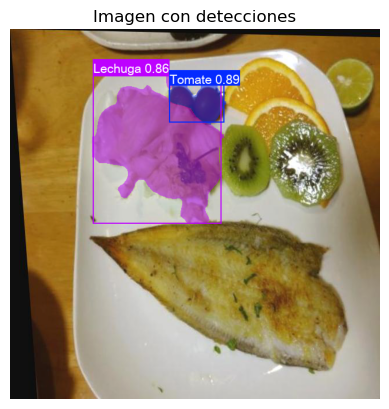

Clase: Tomate, Confianza: 0.89, Coordenadas de segmentación:
[[        280          98]
 [        280         103]
 [        278         105]
 [        274         105]
 [        274         126]
 [        278         126]
 [        279         127]
 [        280         127]
 [        281         128]
 [        283         128]
 [        284         129]
 [        286         129]
 [        287         130]
 [        291         130]
 [        292         131]
 [        297         131]
 [        298         132]
 [        300         132]
 [        301         133]
 [        302         133]
 [        303         134]
 [        305         134]
 [        306         135]
 [        309         135]
 [        310         136]
 [        312         136]
 [        315         139]
 [        315         140]
 [        316         141]
 [        316         142]
 [        318         144]
 [        318         145]
 [        319         146]
 [        319         147]
 [        320        

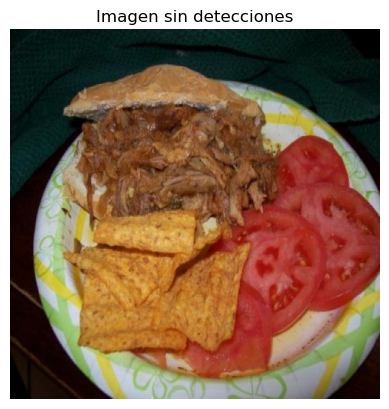

Clase: Tomate, Confianza: 0.76, Coordenadas de segmentación:
[[        499         182]
 [        499         186]
 [        496         189]
 [        495         189]
 [        493         191]
 [        492         191]
 [        489         194]
 [        488         194]
 [        484         198]
 [        483         198]
 [        471         210]
 [        470         210]
 [        470         211]
 [        466         215]
 [        466         216]
 [        465         217]
 [        465         219]
 [        464         220]
 [        464         246]
 [        463         247]
 [        463         253]
 [        462         254]
 [        462         262]
 [        461         263]
 [        461         265]
 [        462         266]
 [        462         279]
 [        461         280]
 [        461         282]
 [        460         283]
 [        460         284]
 [        459         285]
 [        459         286]
 [        458         287]
 [        458        

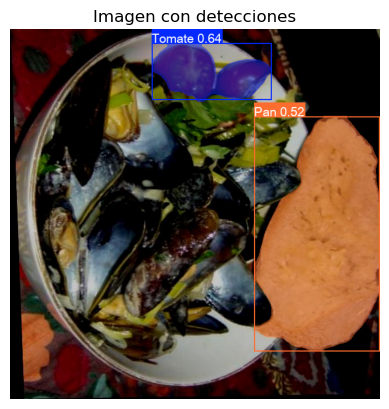

Clase: Tomate, Confianza: 0.64, Coordenadas de segmentación:
[[        272          26]
 [        272          30]
 [        271          31]
 [        270          31]
 [        267          34]
 [        266          34]
 [        262          38]
 [        261          38]
 [        256          43]
 [        256          44]
 [        249          51]
 [        246          51]
 [        246          74]
 [        249          74]
 [        250          75]
 [        251          75]
 [        252          76]
 [        253          76]
 [        254          77]
 [        255          77]
 [        256          78]
 [        257          78]
 [        260          81]
 [        261          81]
 [        263          83]
 [        263          84]
 [        268          89]
 [        268          90]
 [        271          93]
 [        271          95]
 [        272          96]
 [        272          98]
 [        273          99]
 [        273         100]
 [        274        

In [2]:
model = YOLO("/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/Modelo/modelos_entrenados/yolo11l-seg_batch8/best.pt")

carpeta_imagenes = "/home/iabd/Escritorio/prueba_nifi_fotos"

for img_name in os.listdir(carpeta_imagenes):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Solo archivos de imagen
        img_path = os.path.join(carpeta_imagenes, img_name)

        img = Image.open(img_path)

        # Deteccion de objetos en la imagen
        resultados = model(img)

        # Imagen anotada con las detecciones
        pred = resultados[0].plot()
        pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

        # Mostrar los resultados
        plt.imshow(pred)
        plt.axis("off") 
        plt.title("Imagen con detecciones")
        plt.show()

        plt.imshow(img)
        plt.axis("off") 
        plt.title("Imagen sin detecciones")
        plt.show()


        # Extraer y mostrar coordenadas de segmentación
        if resultados[0].masks is not None:
            for i, mask in enumerate(resultados[0].masks.xy):
                label = resultados[0].names[int(resultados[0].boxes.cls[i])]  # Obtener la clase detectada
                conf = resultados[0].boxes.conf[i]  # Obtener la confianza
                print(f"Clase: {label}, Confianza: {conf:.2f}, Coordenadas de segmentación:")
                print(mask)  # Imprimir todas las coordenadas del polígono
        else:
            print("No se encontraron máscaras de segmentación en la imagen.")



0: 640x640 1 Tomate, 1 Lechuga, 14.7ms
Speed: 2.1ms preprocess, 14.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


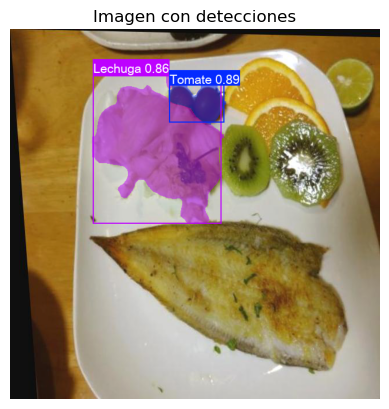

Clase: Tomate, Confianza: 0.89, Coordenadas de segmentación:
[[        280          98]
 [        280         103]
 [        278         105]
 [        274         105]
 [        274         126]
 [        278         126]
 [        279         127]
 [        280         127]
 [        281         128]
 [        283         128]
 [        284         129]
 [        286         129]
 [        287         130]
 [        291         130]
 [        292         131]
 [        297         131]
 [        298         132]
 [        300         132]
 [        301         133]
 [        302         133]
 [        303         134]
 [        305         134]
 [        306         135]
 [        309         135]
 [        310         136]
 [        312         136]
 [        315         139]
 [        315         140]
 [        316         141]
 [        316         142]
 [        318         144]
 [        318         145]
 [        319         146]
 [        319         147]
 [        320        

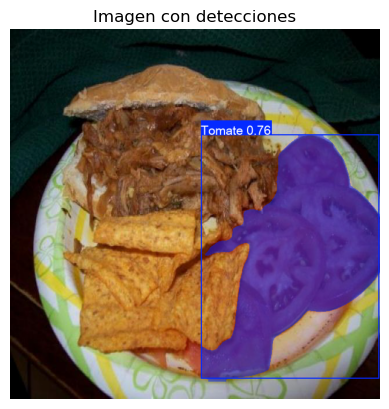

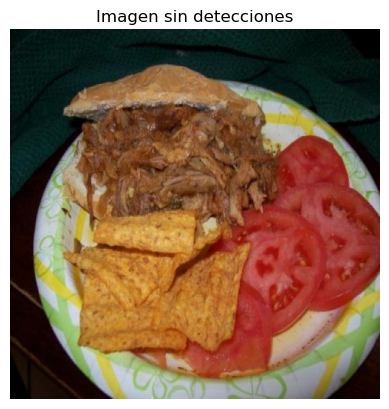

Clase: Tomate, Confianza: 0.76, Coordenadas de segmentación:
[[        499         182]
 [        499         186]
 [        496         189]
 [        495         189]
 [        493         191]
 [        492         191]
 [        489         194]
 [        488         194]
 [        484         198]
 [        483         198]
 [        471         210]
 [        470         210]
 [        470         211]
 [        466         215]
 [        466         216]
 [        465         217]
 [        465         219]
 [        464         220]
 [        464         246]
 [        463         247]
 [        463         253]
 [        462         254]
 [        462         262]
 [        461         263]
 [        461         265]
 [        462         266]
 [        462         279]
 [        461         280]
 [        461         282]
 [        460         283]
 [        460         284]
 [        459         285]
 [        459         286]
 [        458         287]
 [        458        

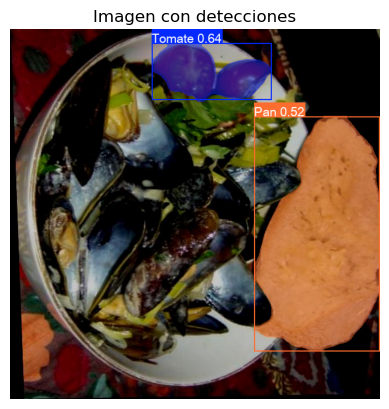

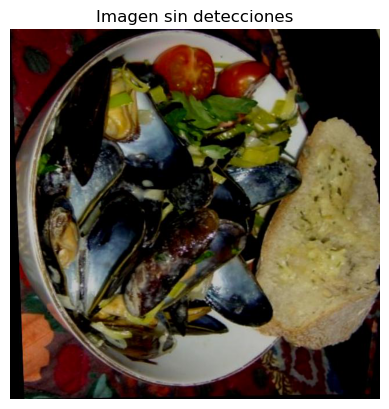

Clase: Tomate, Confianza: 0.64, Coordenadas de segmentación:
[[        272          26]
 [        272          30]
 [        271          31]
 [        270          31]
 [        267          34]
 [        266          34]
 [        262          38]
 [        261          38]
 [        256          43]
 [        256          44]
 [        249          51]
 [        246          51]
 [        246          74]
 [        249          74]
 [        250          75]
 [        251          75]
 [        252          76]
 [        253          76]
 [        254          77]
 [        255          77]
 [        256          78]
 [        257          78]
 [        260          81]
 [        261          81]
 [        263          83]
 [        263          84]
 [        268          89]
 [        268          90]
 [        271          93]
 [        271          95]
 [        272          96]
 [        272          98]
 [        273          99]
 [        273         100]
 [        274        

In [3]:
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Cargar el modelo YOLO
model = YOLO("/home/iabd/Escritorio/7_Reto2_0ndAAkin_G3/Modelo/modelos_entrenados/yolo11l-seg_batch8/best.pt")

# Carpeta con imágenes de prueba
carpeta_imagenes = "/home/iabd/Escritorio/prueba_nifi_fotos"

# Carpeta donde guardar las imágenes con las detecciones
carpeta_guardar = "/home/iabd/Escritorio/carpeta_img/img_seg"

# Crear la carpeta si no existe
os.makedirs(carpeta_guardar, exist_ok=True)

# Iterar sobre las imágenes
for img_name in os.listdir(carpeta_imagenes):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Solo archivos de imagen
        img_path = os.path.join(carpeta_imagenes, img_name)

        img = Image.open(img_path)

        # Detección de objetos en la imagen
        resultados = model(img)

        # Imagen anotada con las detecciones
        pred = resultados[0].plot()
        pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

        # Guardar la imagen con las detecciones
        img_guardada_path = os.path.join(carpeta_guardar, f"detectada_{img_name}")
        cv2.imwrite(img_guardada_path, cv2.cvtColor(pred, cv2.COLOR_RGB2BGR))

        # Mostrar los resultados
        plt.imshow(pred)
        plt.axis("off") 
        plt.title("Imagen con detecciones")
        plt.show()

        plt.imshow(img)
        plt.axis("off") 
        plt.title("Imagen sin detecciones")
        plt.show()

        # Extraer y mostrar coordenadas de segmentación
        if resultados[0].masks is not None:
            for i, mask in enumerate(resultados[0].masks.xy):
                label = resultados[0].names[int(resultados[0].boxes.cls[i])]  # Obtener la clase detectada
                conf = resultados[0].boxes.conf[i]  # Obtener la confianza
                print(f"Clase: {label}, Confianza: {conf:.2f}, Coordenadas de segmentación:")
                print(mask)  # Imprimir todas las coordenadas del polígono
        else:
            print("No se encontraron máscaras de segmentación en la imagen.")


## REENTRENAMIENTO YOLO11L (BATCH)

In [ ]:
model = YOLO("/home/iabd/Escritorio/clase/7_Reto2_0ndAAkin_G3/yolo11l-seg_batch8/best.pt")

# Define el modelo y el archivo de configuración
data_yaml= "/home/iabd/Escritorio/clase/datasets/dataset_fotos/data.yaml"  # Ruta del archivo data.yaml

model.train(data=data_yaml, batch=8, epochs=100)

New https://pypi.org/project/ultralytics/8.3.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.62 🚀 Python-3.12.2 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
engine/trainer: task=segment, mode=train, model=/home/iabd/Escritorio/clase/7_Reto2_0ndAAkin_G3/yolo11l-seg_batch8/best.pt, data=/home/iabd/Escritorio/dataset_fotos/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fa

RuntimeError: Dataset '/home/iabd/Escritorio/dataset_fotos/data.yaml' error ❌ '/home/iabd/Escritorio/dataset_fotos/data.yaml' does not exist

In [4]:
metricas = model.val()

print(f"Metricas de evaluación: {metricas}") 

Ultralytics 8.3.62 🚀 Python-3.12.2 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11l-seg summary (fused): 491 layers, 27,615,432 parameters, 0 gradients


val: Scanning /home/iabd/Escritorio/clase/datasets/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:06<00:00,  6.46it/s]


                   all        332        547      0.935      0.933      0.962      0.871      0.932      0.928      0.954        0.8
                Tomate        116        120      0.935      0.718      0.903      0.775      0.967      0.742      0.935      0.643
             Zanahoria         14         14          1      0.986      0.995      0.886          1      0.985      0.995       0.85
                   Ajo          4          4      0.957          1      0.995      0.995      0.718       0.75      0.637      0.358
             Calabacín          3          3      0.945          1      0.995      0.995      0.945          1      0.995      0.966
                Patata         16         25      0.954       0.88      0.864        0.8      0.954       0.88      0.864      0.765
                Puerro          2          2      0.937          1      0.995      0.995      0.937          1      0.995      0.697
                 Berro          3          3      0.955          1   

## ENTRENAMIENTO YOLO11X (BATCH) UNFREEZING

In [11]:
from ultralytics import YOLO

# Cargar el modelo de segmentación
model = YOLO('yolo11x-seg.pt')
data_yaml = "/home/iabd/Escritorio/clase/datasets/dataset_fotos/data.yaml"

# Imprimir la arquitectura del modelo
print(model.model)


SegmentationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)


In [12]:
# Congelar todo el modelo
for param in model.parameters():
    param.requires_grad = False

# Descongelar capas específicas (ajustar según la estructura del modelo)
for param in model.model.model[-3:].parameters():  # Últimos 3 bloques del backbone
    param.requires_grad = True

# Descongelar ProtoNet (si está presente)
if hasattr(model.model, 'head') and hasattr(model.model.head, 'Proto'):
    for param in model.model.head.Proto.parameters():
        param.requires_grad = True

# Parámetros de entrenamiento
train_args = {
    'data': data_yaml,
    'epochs': 100,
    'batch': 8,
    'imgsz': 640,
    'lr0': 1e-4,
    'device': '0',
    'name': 'entrenamiento_selectivo',
    'optimizer': 'AdamW',
    'patience': 20,
    'mosaic': 0.5
}

# Iniciar entrenamiento
results = model.train(**train_args)


New https://pypi.org/project/ultralytics/8.3.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.62 🚀 Python-3.12.2 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
engine/trainer: task=segment, mode=train, model=yolo11x-seg.pt, data=/home/iabd/Escritorio/clase/datasets/dataset_fotos/data.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=entrenamiento_selectivo4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

train: Scanning /home/iabd/Escritorio/clase/datasets/dataset_fotos/train/labels.cache... 5297 images, 34 backgrounds, 0 corrupt: 100%|██████████| 5297/5297 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/iabd/Escritorio/clase/datasets/dataset_fotos/train/images/UBEAT_69_10_1_frame_231_jpg.rf.b18871b998ee767d3289ef66bc254c67.jpg: 1 duplicate labels removed



val: Scanning /home/iabd/Escritorio/clase/datasets/dataset_fotos/valid/labels.cache... 332 images, 2 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]


Plotting labels to runs/segment/entrenamiento_selectivo4/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 176 weight(decay=0.0), 187 weight(decay=0.0005), 186 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/entrenamiento_selectivo4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.2G     0.9497      2.651      2.266      1.387          4        640: 100%|██████████| 663/663 [05:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.12it/s]

                   all        332        547      0.702      0.377      0.472       0.39      0.707      0.378      0.468      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.3G     0.8939       2.35      1.714      1.362          5        640: 100%|██████████| 663/663 [04:57<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]

                   all        332        547      0.507      0.574      0.626      0.525      0.484      0.534      0.577      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.2G       0.89      2.303      1.556      1.362          3        640: 100%|██████████| 663/663 [04:52<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.20it/s]

                   all        332        547      0.626      0.663      0.669      0.546      0.633      0.667       0.67      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.1G     0.8738      2.211        1.5      1.351          2        640: 100%|██████████| 663/663 [04:52<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547      0.732      0.611      0.734      0.602      0.737      0.618      0.734      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100        10G     0.8545      2.162      1.406      1.336          1        640: 100%|██████████| 663/663 [04:51<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.19it/s]

                   all        332        547       0.63      0.721      0.754      0.631      0.625       0.71      0.745      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.1G     0.8333      2.149      1.343      1.317          2        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        332        547      0.818      0.705      0.844       0.73      0.826      0.706      0.843      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100        10G     0.8061      2.096      1.271      1.294          5        640: 100%|██████████| 663/663 [04:50<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.753      0.727      0.806      0.668      0.739      0.716      0.801      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100        10G     0.7832      2.028      1.213      1.276          3        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.725      0.756      0.832      0.698      0.728       0.76      0.827      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.1G     0.7781      2.006      1.168      1.272          3        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.765      0.799      0.857      0.721      0.751      0.796      0.847       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.2G     0.7511      1.951      1.109      1.253          3        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]

                   all        332        547      0.729      0.804      0.868      0.742      0.746      0.817      0.866      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100        10G     0.7378      1.937      1.084      1.247          5        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

                   all        332        547      0.801      0.785      0.884      0.766      0.792      0.777      0.871      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.1G     0.7266      1.921      1.067      1.237          4        640: 100%|██████████| 663/663 [04:51<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.20it/s]

                   all        332        547      0.826      0.775      0.892      0.757       0.84      0.791      0.897      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100        10G     0.7151       1.85       1.01      1.214          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.865      0.822      0.894      0.771      0.862      0.822      0.885      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100        10G     0.7028      1.838     0.9702      1.213          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.862      0.839       0.89      0.772      0.859      0.835      0.886      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100        10G     0.6999      1.827     0.9769      1.214          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.857      0.821      0.891      0.765       0.86      0.813      0.878        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100        10G     0.6817      1.781     0.9435      1.193          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.859      0.788      0.842      0.721       0.86      0.795      0.838      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100        10G     0.6767       1.77     0.9291      1.181          2        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]

                   all        332        547      0.754       0.93      0.915      0.789      0.748      0.923      0.906      0.734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.2G     0.6666      1.725     0.8845      1.179          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.884      0.834      0.936      0.813      0.879      0.828      0.924      0.744



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100        10G     0.6635      1.724     0.8796      1.176          6        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.849      0.894      0.923      0.801      0.841      0.886      0.911      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100        10G     0.6468      1.665      0.837      1.166          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]

                   all        332        547        0.9      0.828      0.889      0.785      0.899      0.826       0.88      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100        10G     0.6419      1.689     0.8309      1.162          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547      0.828      0.882      0.924      0.809      0.823      0.876      0.912      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.1G     0.6354       1.65     0.8153       1.15          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.896      0.851      0.927      0.797      0.894      0.849      0.911      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.1G     0.6172      1.656     0.8251       1.14          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.20it/s]

                   all        332        547      0.904      0.891      0.923      0.813      0.898      0.887      0.911      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.98G      0.623      1.623     0.7809      1.142          4        640: 100%|██████████| 663/663 [04:51<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]

                   all        332        547      0.863       0.86      0.904      0.786      0.862      0.857      0.896      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.1G     0.6068      1.597       0.76      1.128          3        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.875      0.865      0.916      0.806      0.878       0.86      0.904      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.1G     0.6095      1.591     0.7444      1.133          2        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.889      0.884      0.933      0.801      0.881      0.877      0.918      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.3G     0.5975      1.555     0.7456      1.124          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.872      0.874       0.92      0.814      0.862      0.875      0.913      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.3G     0.6036       1.56     0.7338      1.127          3        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.891      0.839      0.918      0.797      0.891      0.866      0.928      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100        10G     0.5874      1.529     0.7024      1.111          6        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.868      0.839      0.912      0.804      0.864      0.838      0.914      0.752



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.3G     0.5911      1.521        0.7       1.11          5        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]

                   all        332        547      0.871      0.897      0.921      0.806      0.881        0.9      0.927      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100        10G     0.5836      1.509     0.6854      1.109          2        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.838      0.867      0.908      0.801      0.836       0.86      0.896      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.3G     0.5813      1.483     0.6666      1.102          3        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.883      0.886      0.922      0.805       0.88      0.877      0.908      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100        10G     0.5628      1.449     0.6558      1.089          3        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.907      0.909       0.94      0.843      0.915      0.917      0.941      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.2G     0.5693      1.447     0.6388      1.095         12        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.859      0.907      0.937      0.823      0.869      0.918      0.936      0.759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100        10G      0.565      1.454     0.6405      1.095          4        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.855       0.93      0.945      0.829      0.862      0.936      0.942       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.3G     0.5581      1.417     0.6199      1.081          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.895      0.916      0.949      0.842      0.899      0.922      0.947       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.4G     0.5526      1.435     0.6288      1.083          5        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547      0.903        0.9      0.936      0.837      0.913      0.908      0.938      0.759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100        10G     0.5461      1.405     0.6032      1.077         12        640: 100%|██████████| 663/663 [04:51<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.891      0.911      0.935      0.812      0.899      0.921      0.932      0.752



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.3G     0.5442      1.383     0.5996      1.077          2        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]

                   all        332        547      0.888      0.908      0.944      0.846      0.894      0.916      0.941      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.3G     0.5388      1.343     0.5858      1.073          2        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.13it/s]

                   all        332        547      0.903      0.907      0.946      0.844      0.911      0.906      0.938      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.3G     0.5318      1.371     0.5664      1.067          7        640: 100%|██████████| 663/663 [04:51<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        332        547      0.925      0.895      0.953      0.836      0.934      0.905       0.95      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.2G     0.5231      1.343     0.5568      1.057          4        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.914      0.928      0.951      0.852       0.91      0.923      0.943      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.3G     0.5272      1.338     0.5578      1.059          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.902      0.897       0.93      0.828      0.896       0.89      0.919      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.3G      0.524       1.31     0.5439      1.057          5        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]

                   all        332        547      0.903      0.891      0.946      0.845        0.9      0.895      0.934      0.773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.3G     0.5103      1.311     0.5419      1.053          8        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.905      0.904      0.945      0.838      0.914      0.914      0.951      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.3G     0.5133      1.302     0.5362      1.052          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.896      0.906      0.936      0.841      0.907       0.89       0.93      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.1G     0.5059      1.297     0.5314      1.044          4        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        332        547      0.911      0.892      0.942       0.84      0.923      0.904       0.95      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100        10G     0.5105      1.283      0.525      1.044          2        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.902      0.903      0.948      0.842      0.894      0.893      0.935      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.4G     0.5092       1.28     0.5089      1.042          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        332        547      0.932      0.891       0.94      0.847      0.925      0.885      0.938      0.776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.2G     0.5029      1.259     0.5116      1.039          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547      0.892      0.913       0.95      0.865      0.901      0.919      0.939      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100        10G     0.4938      1.242     0.5034      1.036          0        640: 100%|██████████| 663/663 [04:51<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        332        547      0.901      0.903      0.944      0.849      0.917      0.905      0.949      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.3G      0.492      1.249     0.4984      1.037          1        640: 100%|██████████| 663/663 [04:51<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547       0.93      0.913      0.943      0.858      0.935       0.92      0.946      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.1G     0.4975      1.234      0.486      1.037          2        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        332        547      0.937      0.936      0.968      0.872      0.934      0.931      0.955      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.3G      0.488      1.234     0.4864      1.027          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]

                   all        332        547      0.939      0.931      0.967      0.885      0.931      0.928      0.958      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.3G     0.4746      1.209     0.4665      1.021          4        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        332        547      0.912      0.934      0.952      0.865      0.905      0.927      0.938      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.3G     0.4676      1.188     0.4518      1.018          4        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547      0.901      0.931      0.944      0.847      0.915      0.935      0.947      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.3G     0.4724       1.18     0.4462      1.016          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

                   all        332        547      0.907      0.911      0.935      0.849        0.9      0.905      0.924      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.1G     0.4697       1.18     0.4471      1.014          7        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.922      0.913       0.95      0.856      0.916      0.907      0.943      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.3G     0.4707       1.17      0.446      1.015          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.913      0.907      0.948      0.862      0.915      0.907      0.946      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.4G     0.4633      1.146     0.4261      1.008          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]

                   all        332        547      0.904      0.909       0.95      0.861      0.907      0.915      0.956      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100        10G     0.4592      1.159     0.4387      1.009          3        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.902      0.917      0.958      0.864      0.901      0.915      0.954      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100        10G     0.4521      1.158     0.4282      1.002          3        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.923      0.902      0.954      0.856      0.916      0.895      0.942      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100        10G     0.4557      1.132     0.4258     0.9982          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        332        547      0.944      0.909      0.949      0.863      0.942      0.902      0.941      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100        10G     0.4535      1.134     0.4214      1.002          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        332        547      0.947      0.905      0.942      0.849      0.916      0.927      0.942      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.3G     0.4493      1.127     0.4067      1.003          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]

                   all        332        547      0.917      0.904      0.944      0.865      0.904       0.91      0.945      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.2G     0.4457      1.112     0.4006      0.997          3        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.939      0.903      0.947      0.849      0.933      0.895      0.945      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.3G     0.4458      1.093     0.3996     0.9952          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        332        547      0.915      0.899      0.943      0.857      0.914      0.921      0.955      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100        10G     0.4399      1.081      0.387     0.9892          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.908      0.897      0.932      0.838      0.919      0.909      0.939      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100        10G     0.4311      1.075     0.3922     0.9895          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        332        547      0.921      0.911      0.936      0.846      0.923      0.918      0.942      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100        10G     0.4317      1.073     0.3897     0.9902          8        640: 100%|██████████| 663/663 [04:50<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

                   all        332        547      0.917      0.906      0.935      0.848       0.91      0.898      0.923      0.776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.3G     0.4336      1.061     0.3896     0.9914          1        640: 100%|██████████| 663/663 [04:50<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]

                   all        332        547      0.899      0.915      0.939       0.85      0.895      0.911       0.93      0.776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.3G     0.4284      1.046     0.3865     0.9913          1        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]

                   all        332        547      0.918      0.905       0.94      0.849      0.925      0.912      0.944      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100        10G     0.4277      1.051     0.3806     0.9875          2        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        332        547      0.926      0.905      0.941      0.849      0.919      0.906      0.939      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.2G     0.4227      1.036     0.3738     0.9846          7        640: 100%|██████████| 663/663 [04:49<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]

                   all        332        547      0.912        0.9      0.932       0.85      0.903      0.909       0.93      0.778
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 54, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



74 epochs completed in 6.131 hours.
Optimizer stripped from runs/segment/entrenamiento_selectivo4/weights/last.pt, 124.8MB
Optimizer stripped from runs/segment/entrenamiento_selectivo4/weights/best.pt, 124.8MB

Validating runs/segment/entrenamiento_selectivo4/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.12.2 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12003MiB)
YOLO11x-seg summary (fused): 491 layers, 62,048,328 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]


                   all        332        547      0.939      0.932      0.967      0.884      0.929      0.931      0.958      0.811
                Tomate        116        120      0.933      0.815      0.928      0.755      0.963      0.859      0.955      0.624
             Zanahoria         14         14      0.994          1      0.995      0.891      0.992          1      0.995      0.821
                   Ajo          4          4      0.952          1      0.995      0.995      0.711       0.75      0.726      0.422
             Calabacín          3          3      0.941          1      0.995      0.995      0.936          1      0.995      0.837
                Patata         16         25      0.955       0.85      0.866      0.796          1      0.895       0.93       0.78
                Puerro          2          2      0.921          1      0.995      0.995      0.914          1      0.995      0.702
                 Berro          3          3      0.945          1   